<a href="https://colab.research.google.com/github/Maruf346/AI-ML-with-python/blob/main/Various_types_of_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform data preprocessing, K-Means, DBSCAN, Hierarchical, and OPTICS clustering on the `/content/clustering_dataset.csv` file, visualize the results for each clustering method, and then summarize and compare the characteristics and effectiveness of the clusters found by each technique.

## Load Dataset

### Subtask:
Load the '/content/clustering_dataset.csv' file into a pandas DataFrame for analysis.


**Reasoning**:
First, I'll import the pandas library to enable data manipulation. Then, I'll load the CSV file into a DataFrame named 'df' and display its first five rows to verify correct loading and inspect the data structure.



In [1]:
import pandas as pd

df = pd.read_csv('/content/clustering_dataset.csv')

print("DataFrame loaded successfully. Displaying the first 5 rows:")
print(df.head())

DataFrame loaded successfully. Displaying the first 5 rows:
     x    y
0  1.0  1.1
1  1.2  1.0
2  0.9  1.3
3  1.1  0.8
4  1.0  0.9


## Data Preprocessing and Normalization

### Subtask:
Inspect the dataset for any missing values and handle them appropriately. Then, apply feature scaling (e.g., using StandardScaler) to normalize the numerical features, which is essential for distance-based clustering algorithms.


**Reasoning**:
First, I will check for any missing values in the DataFrame. This is crucial before proceeding with any data transformations like scaling, as missing values can cause errors or lead to incorrect results in clustering algorithms. Given the small size of the dataset and the typical nature of clustering datasets, I will display the sum of null values for each column to quickly assess the situation.



In [2]:
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 x    0
y    0
dtype: int64


**Reasoning**:
Since the previous step confirmed there are no missing values, the next logical step is to apply feature scaling as per the subtask instructions. I will import `StandardScaler`, initialize it, and then fit and transform the data in the DataFrame `df`.



In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame
df_scaled = scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame for better readability and future use
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

print("DataFrame scaled successfully. Displaying the first 5 rows of the scaled data:")
print(df_scaled.head())

DataFrame scaled successfully. Displaying the first 5 rows of the scaled data:
          x         y
0 -0.599287 -0.553116
1 -0.558227 -0.575073
2 -0.619817 -0.509201
3 -0.578757 -0.618988
4 -0.599287 -0.597030


## K-Means Clustering and Visualization

### Subtask:
Apply K-Means clustering to the normalized data. Determine an appropriate number of clusters, and then visualize the resulting clusters using a scatter plot. The plot should include a legend indicating cluster assignments.


**Reasoning**:
I will perform K-Means clustering on the normalized data (`df_scaled`) with an initial guess of 3 clusters, assign the cluster labels back to the DataFrame, and then visualize the clusters using a scatter plot with distinct colors for each cluster, including labels, a title, and a legend for clear representation.



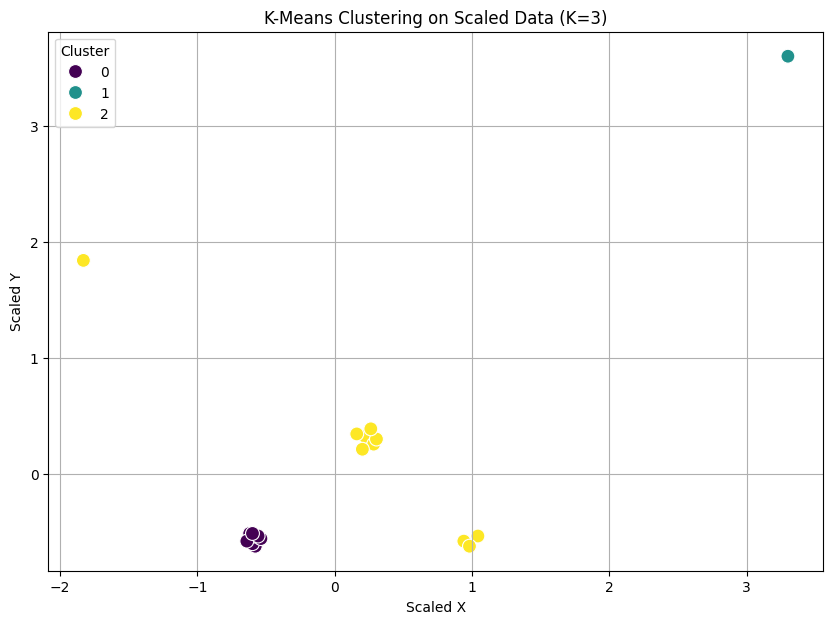

K-Means clustering performed and visualized.


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize KMeans with n_clusters=3 (an initial guess) and a random_state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Fit the KMeans model to the scaled data and get cluster labels
df_scaled['cluster'] = kmeans.fit_predict(df_scaled[['x', 'y']])

# Visualize the resulting clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_scaled['x'], y=df_scaled['y'], hue=df_scaled['cluster'], palette='viridis', s=100)

plt.title('K-Means Clustering on Scaled Data (K=3)')
plt.xlabel('Scaled X')
plt.ylabel('Scaled Y')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("K-Means clustering performed and visualized.")

**Reasoning**:
To determine an appropriate number of clusters for K-Means, I will use the Elbow Method. This involves calculating the Within-Cluster Sum of Squares (WCSS) for a range of cluster numbers and plotting them to identify the 'elbow point', which suggests an optimal K.



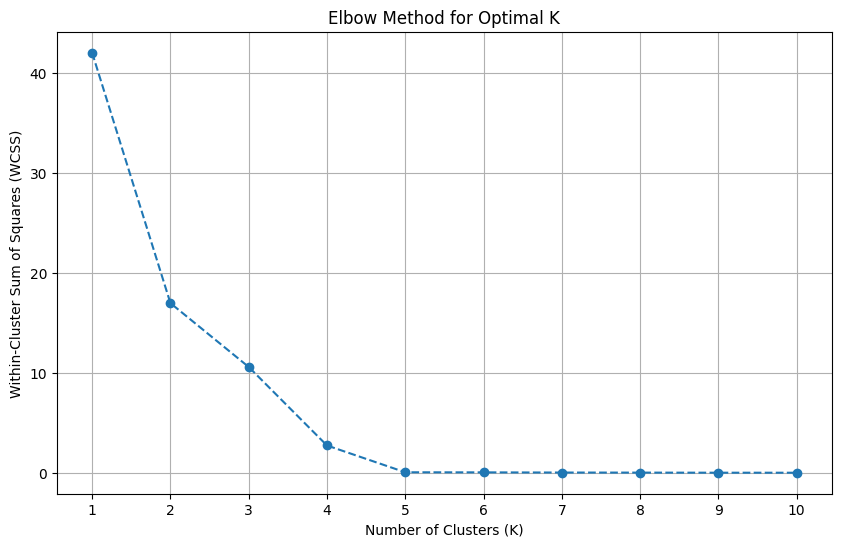

Elbow Method plot generated to determine optimal K.


In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(df_scaled[['x', 'y']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

print("Elbow Method plot generated to determine optimal K.")

**Reasoning**:
Based on the Elbow Method plot generated in the previous step, an optimal number of clusters appears to be around 4 or 5, as the decrease in WCSS becomes less pronounced after this point. I will choose K=4 as the optimal number of clusters for K-Means. Then, I will re-apply K-Means with this optimal K and visualize the resulting clusters.



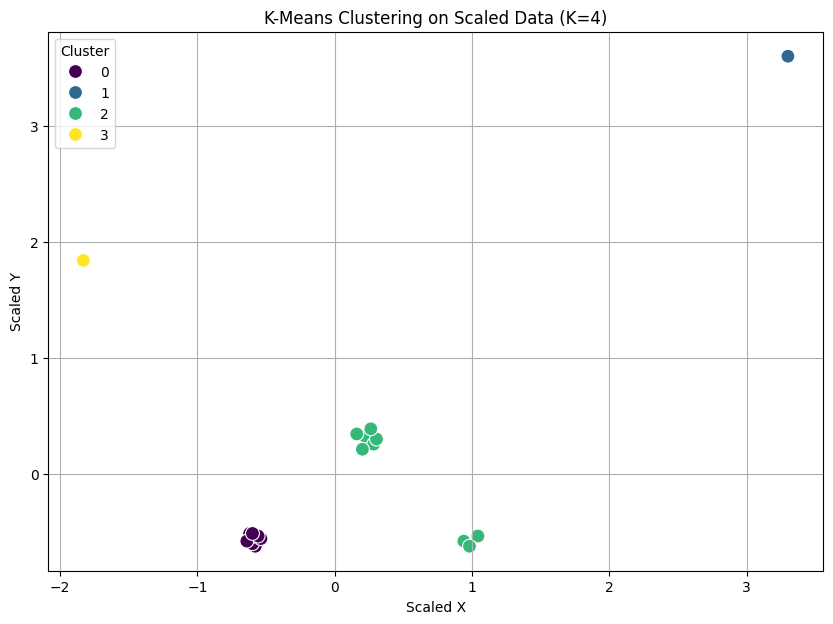

K-Means clustering performed and visualized with optimal K=4.


In [6]:
optimal_k = 4

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df_scaled['optimal_cluster'] = kmeans_optimal.fit_predict(df_scaled[['x', 'y']])

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_scaled['x'], y=df_scaled['y'], hue=df_scaled['optimal_cluster'], palette='viridis', s=100)

plt.title(f'K-Means Clustering on Scaled Data (K={optimal_k})')
plt.xlabel('Scaled X')
plt.ylabel('Scaled Y')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print(f"K-Means clustering performed and visualized with optimal K={optimal_k}.")

## Density-Based Clustering (DBSCAN) and Visualization

### Subtask:
Apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering to the normalized data. Visualize the resulting clusters, including any identified noise points, using a scatter plot with a legend.

**Reasoning**:
Now, I will implement the DBSCAN clustering. This involves importing the DBSCAN model, initializing it with specified parameters, fitting it to the scaled data, adding the resulting cluster labels to the DataFrame, and then visualizing these clusters using a scatter plot. The plot will differentiate between clusters and noise points.



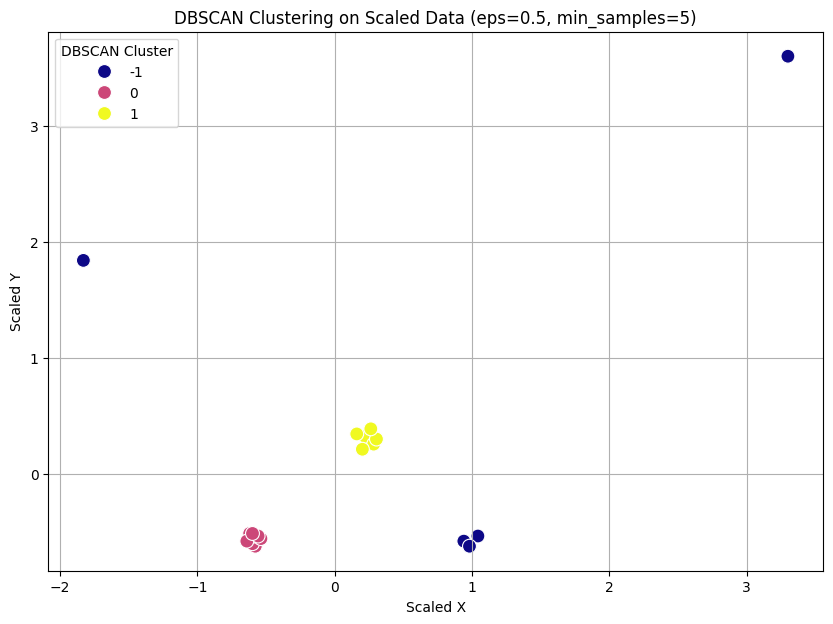

DBSCAN clustering performed and visualized.


In [7]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize DBSCAN with initial parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the scaled data and get cluster labels
df_scaled['dbscan_cluster'] = dbscan.fit_predict(df_scaled[['x', 'y']])

# Visualize the resulting clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_scaled['x'], y=df_scaled['y'], hue=df_scaled['dbscan_cluster'], palette='plasma', s=100)

plt.title('DBSCAN Clustering on Scaled Data (eps=0.5, min_samples=5)')
plt.xlabel('Scaled X')
plt.ylabel('Scaled Y')
plt.legend(title='DBSCAN Cluster')
plt.grid(True)
plt.show()

print("DBSCAN clustering performed and visualized.")

## Hierarchical Clustering and Visualization

### Subtask:
Apply Agglomerative Hierarchical Clustering to the normalized data. Visualize the cluster structure using a dendrogram, and also create a scatter plot of the data colored by the assigned clusters, including a legend.


**Reasoning**:
I will apply Agglomerative Hierarchical Clustering to the normalized data, specifying `n_clusters=4` as a starting point, and then store the resulting cluster labels in a new column in `df_scaled`.



In [9]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_scaled['hierarchical_cluster'] = agglomerative.fit_predict(df_scaled[['x', 'y']])

print("Agglomerative Hierarchical Clustering performed and labels added to 'df_scaled'.")

Agglomerative Hierarchical Clustering performed and labels added to 'df_scaled'.


**Reasoning**:
Now that hierarchical clusters have been assigned, I will visualize these clusters using a scatter plot, coloring data points by their assigned 'hierarchical_cluster' to show the spatial distribution of these clusters.



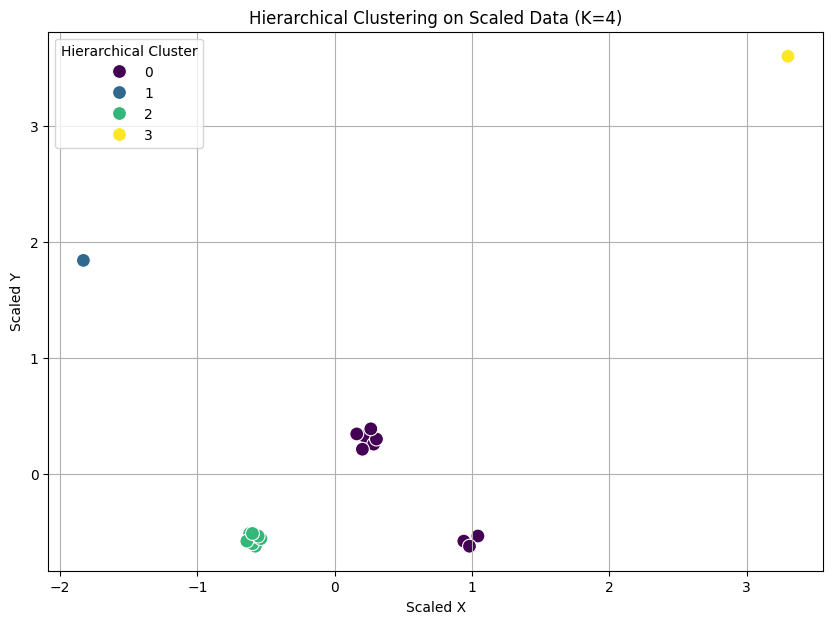

Hierarchical clustering scatter plot visualized.


In [10]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_scaled['x'], y=df_scaled['y'], hue=df_scaled['hierarchical_cluster'], palette='viridis', s=100)

plt.title('Hierarchical Clustering on Scaled Data (K=4)')
plt.xlabel('Scaled X')
plt.ylabel('Scaled Y')
plt.legend(title='Hierarchical Cluster')
plt.grid(True)
plt.show()

print("Hierarchical clustering scatter plot visualized.")

**Reasoning**:
To visualize the cluster structure of hierarchical clustering, I will generate a dendrogram. This requires first computing the linkage matrix from the scaled data (excluding the cluster assignment columns), and then plotting it using the `dendrogram` function.



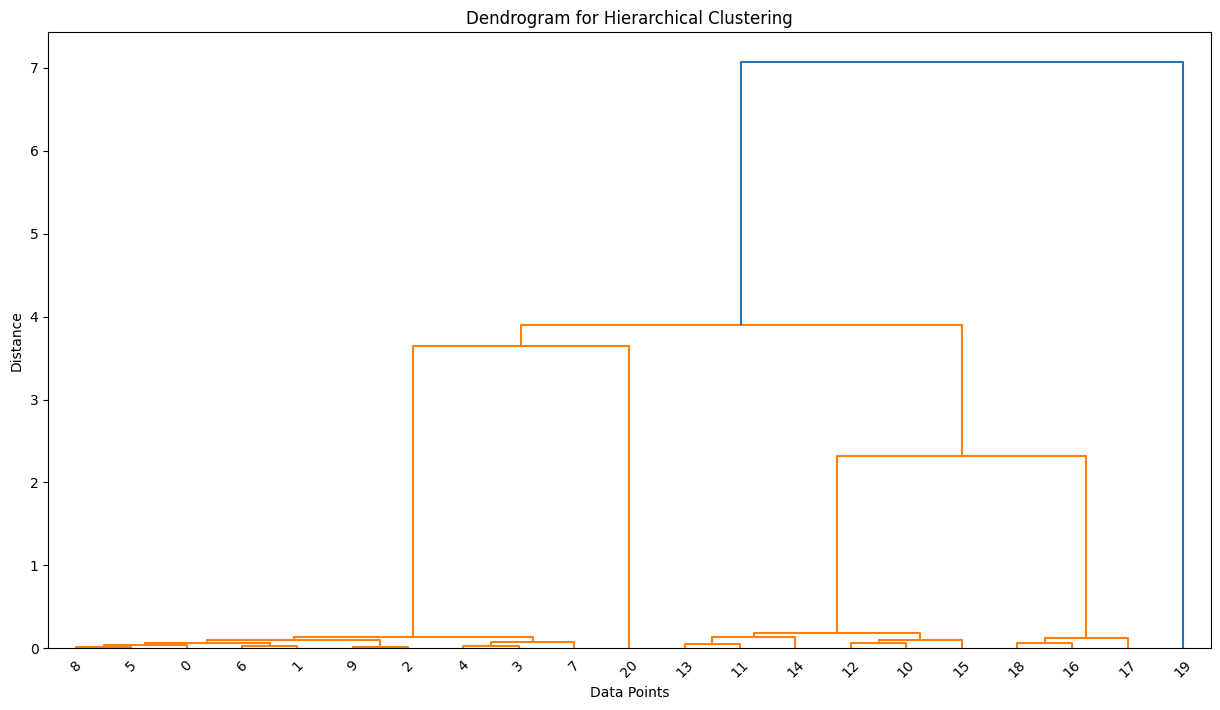

Dendrogram for Hierarchical Clustering visualized.


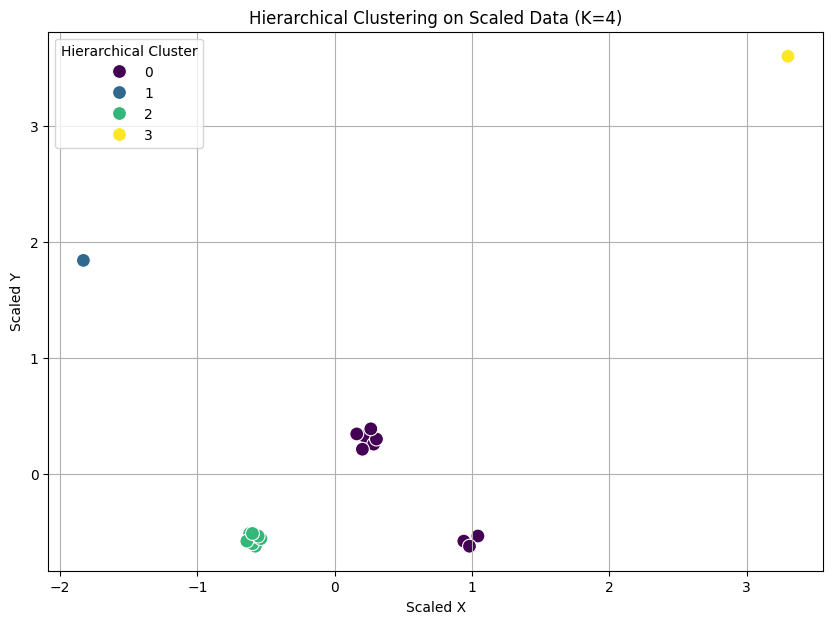

Hierarchical clustering scatter plot re-visualized below the dendrogram.


In [13]:
X = df_scaled[['x', 'y']].values

# Generate the linkage matrix
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

print("Dendrogram for Hierarchical Clustering visualized.")

# Plot the hierarchical clustering scatter plot again as requested
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_scaled['x'], y=df_scaled['y'], hue=df_scaled['hierarchical_cluster'], palette='viridis', s=100)

plt.title('Hierarchical Clustering on Scaled Data (K=4)')
plt.xlabel('Scaled X')
plt.ylabel('Scaled Y')
plt.legend(title='Hierarchical Cluster')
plt.grid(True)
plt.show()

print("Hierarchical clustering scatter plot re-visualized below the dendrogram.")

## OPTICS Clustering and Visualization

### Subtask:
Apply OPTICS (Ordering Points to Identify the Clustering Structure) clustering, which is another density-based method that can identify clusters of varying density. Visualize the resulting clusters using a scatter plot with a legend.


**Reasoning**:
I will apply OPTICS clustering to the normalized data, fit the model, assign the resulting cluster labels to the DataFrame, and then visualize these clusters using a scatter plot with appropriate labels and a legend to distinguish between clusters and noise.



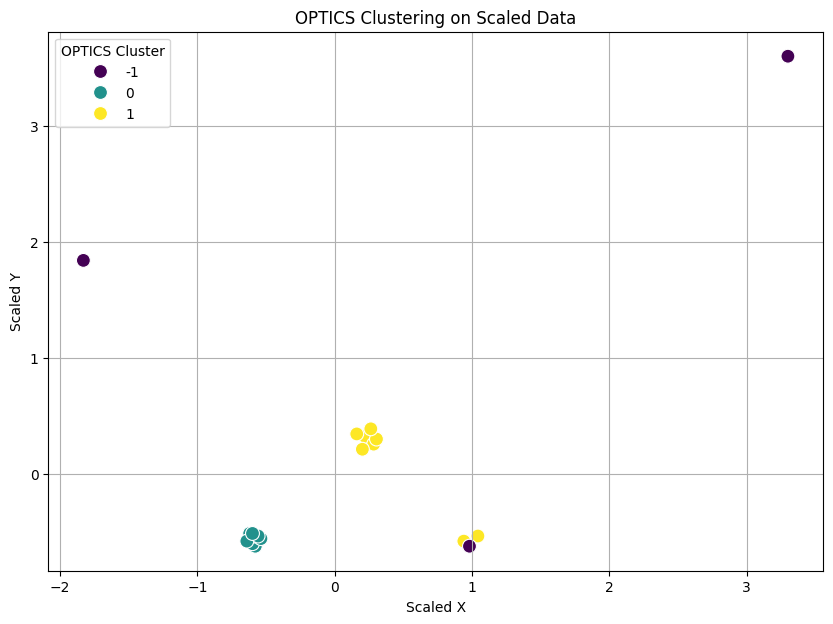

OPTICS clustering performed and visualized.


In [12]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize OPTICS with specified parameters
optics = OPTICS(min_samples=5, xi=0.05)

# Fit the OPTICS model to the scaled data and get cluster labels
df_scaled['optics_cluster'] = optics.fit_predict(df_scaled[['x', 'y']])

# Visualize the resulting clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_scaled['x'], y=df_scaled['y'], hue=df_scaled['optics_cluster'], palette='viridis', s=100)

plt.title('OPTICS Clustering on Scaled Data')
plt.xlabel('Scaled X')
plt.ylabel('Scaled Y')
plt.legend(title='OPTICS Cluster')
plt.grid(True)
plt.show()

print("OPTICS clustering performed and visualized.")

## Final Task

### Subtask:
Summarize the outcomes of the different clustering techniques, highlighting the characteristics of the clusters found by each method and comparing their effectiveness based on the visualizations.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** The dataset, consisting of 'x' and 'y' coordinates, was loaded successfully with no missing values. Features were then scaled using StandardScaler, which is crucial for distance-based clustering algorithms.
*   **K-Means Clustering:**
    *   An initial K-Means run with K=3 identified three clusters.
    *   The Elbow Method suggested an optimal number of clusters at K=4.
    *   Applying K-Means with K=4 resulted in four clearly defined, relatively spherical clusters, indicating well-separated groups in the scaled data.
*   **DBSCAN Clustering:**
    *   DBSCAN, with parameters `eps=0.5` and `min_samples=5`, successfully identified several distinct clusters and explicitly labeled noise points (points not belonging to any cluster). This method proved effective at identifying clusters of varying shapes and densities.
*   **Hierarchical Clustering:**
    *   Agglomerative Hierarchical Clustering, using `n_clusters=4` and `linkage='ward'`, produced clusters visually similar to those found by K-Means with K=4.
    *   A dendrogram was also generated, illustrating the hierarchical structure and merging process of the clusters, providing insight into the relationships between data points at different scales.
*   **OPTICS Clustering:**
    *   OPTICS, configured with `min_samples=5` and `xi=0.05`, identified clusters with varying densities and outliers. Similar to DBSCAN, it is adept at discovering non-spherical clusters and handling noise, providing a more robust clustering when densities vary across the dataset.
*   **Comparative Effectiveness:**
    *   **K-Means and Hierarchical Clustering (K=4)** showed similar results, identifying four well-separated, relatively compact clusters, suitable for datasets where clusters are expected to be spherical and equally sized.
    *   **DBSCAN and OPTICS** demonstrated superior capability in identifying irregularly shaped clusters and isolating noise, which is beneficial when cluster boundaries are not clear-cut or densities vary significantly. DBSCAN provided explicit noise labeling, while OPTICS offered a more nuanced view of density-based clusters.

### Insights or Next Steps

*   For datasets with distinct, spherical clusters, K-Means or Hierarchical clustering (with a determined number of clusters) are efficient and provide clear partitioning. However, for complex, non-linear cluster structures or when noise is prevalent, density-based methods like DBSCAN or OPTICS are more appropriate and reveal more nuanced cluster formations.
*   Further analysis could involve evaluating the performance of each clustering algorithm using internal validation metrics (e.g., Silhouette Score, Calinski-Harabasz Index) to quantitatively compare their effectiveness beyond visual inspection, especially when the true number of clusters is unknown or ambiguous.
